In [1]:
import nb_utils
import os
import run_lib
from dim_reduction import get_manifold_dimension
from configs.utils import read_config
from plot_utils import plot_spectrum, plot_dims
import pickle

Moving cwd to /store/CIA/js2164/repos/diffusion/score_sde_pytorch


/store/CIA/js2164/conda_envs/score_sde/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
#reload plot_utils module
import importlib
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_spectrum, plot_dims

Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/ksphere/n_1/dim_10/random_isometry/non_uniform_1/checkpoints/best/last.ckpt`
100%|█████████▉| 999/1000 [01:03<00:00, 15.64it/s]


Aggregation mode: all
Aggregation mode: all


Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/ksphere/n_1/dim_10/random_isometry/non_uniform_0.75/checkpoints/best/last.ckpt`
100%|█████████▉| 999/1000 [01:07<00:00, 14.71it/s]


Aggregation mode: all
Aggregation mode: all


Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/ksphere/n_1/dim_10/random_isometry/non_uniform_0.5/checkpoints/best/last.ckpt`
100%|█████████▉| 999/1000 [01:02<00:00, 16.06it/s]


Aggregation mode: all
Aggregation mode: all


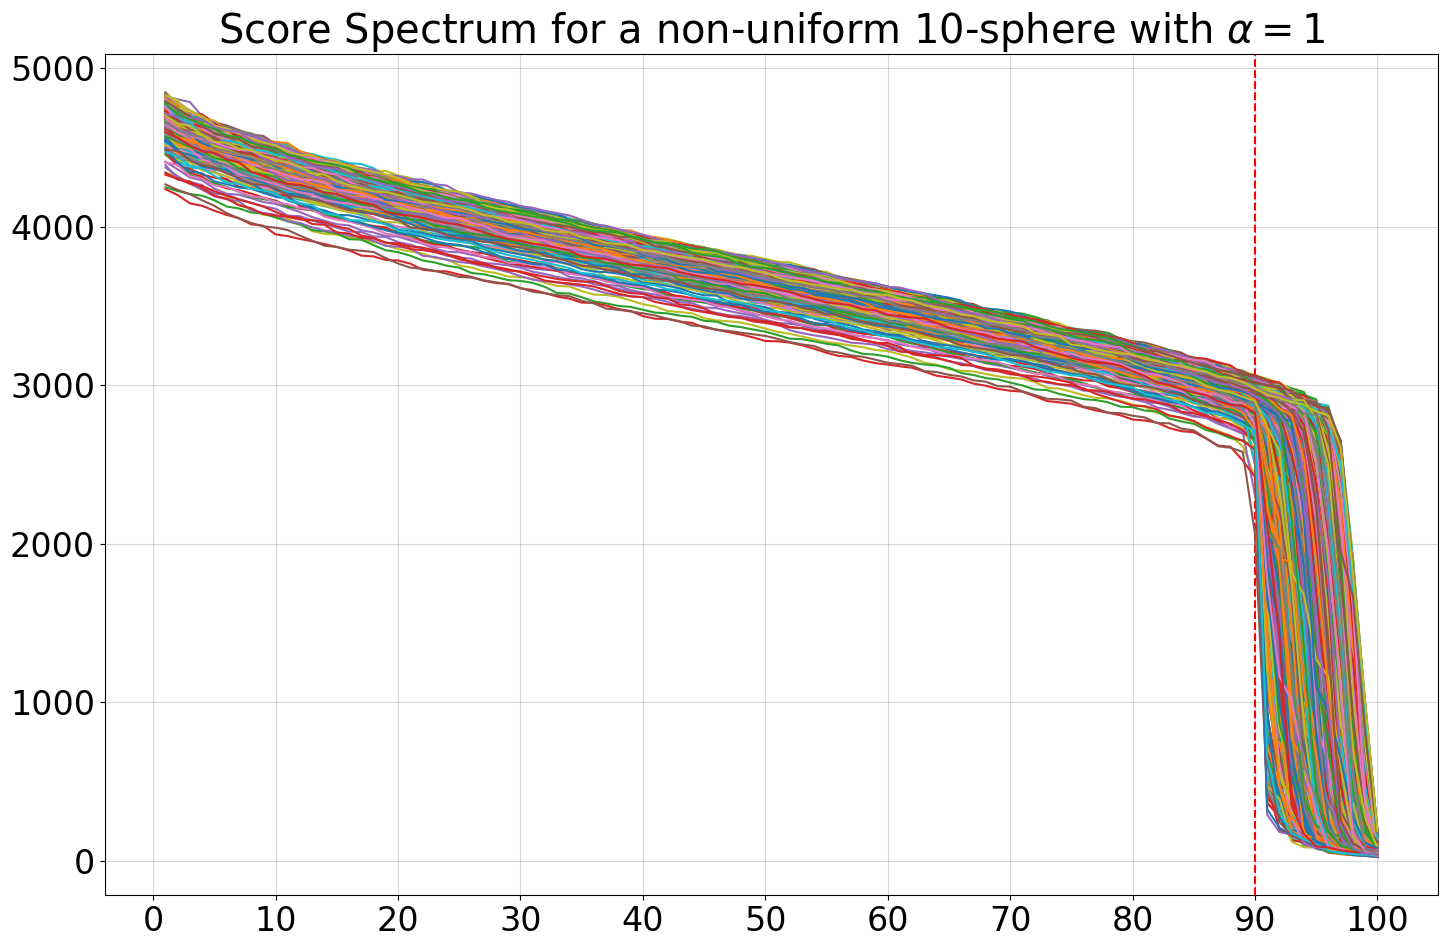

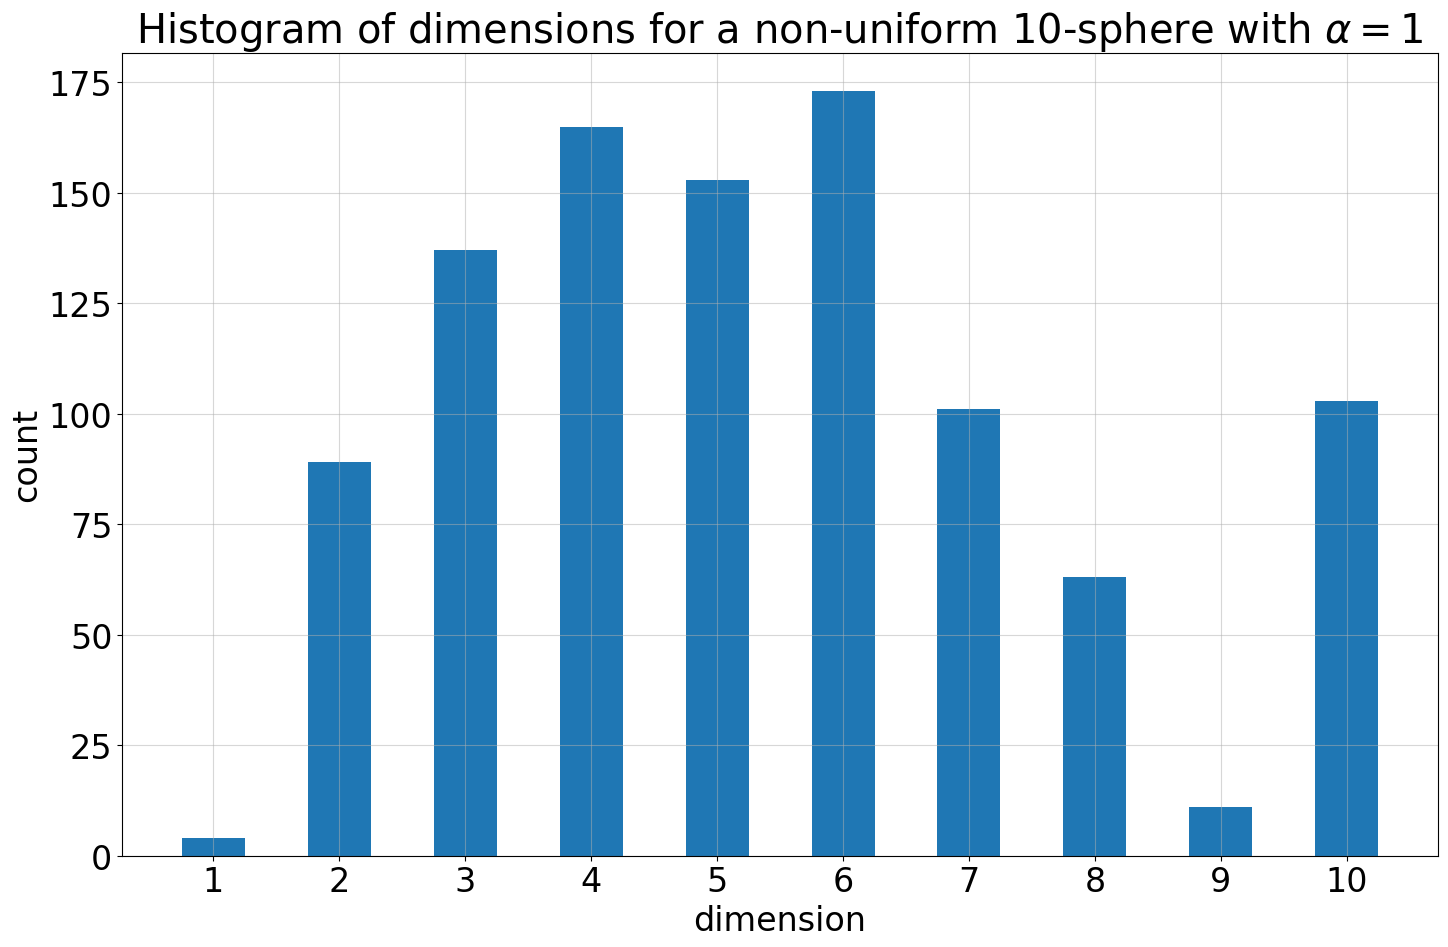

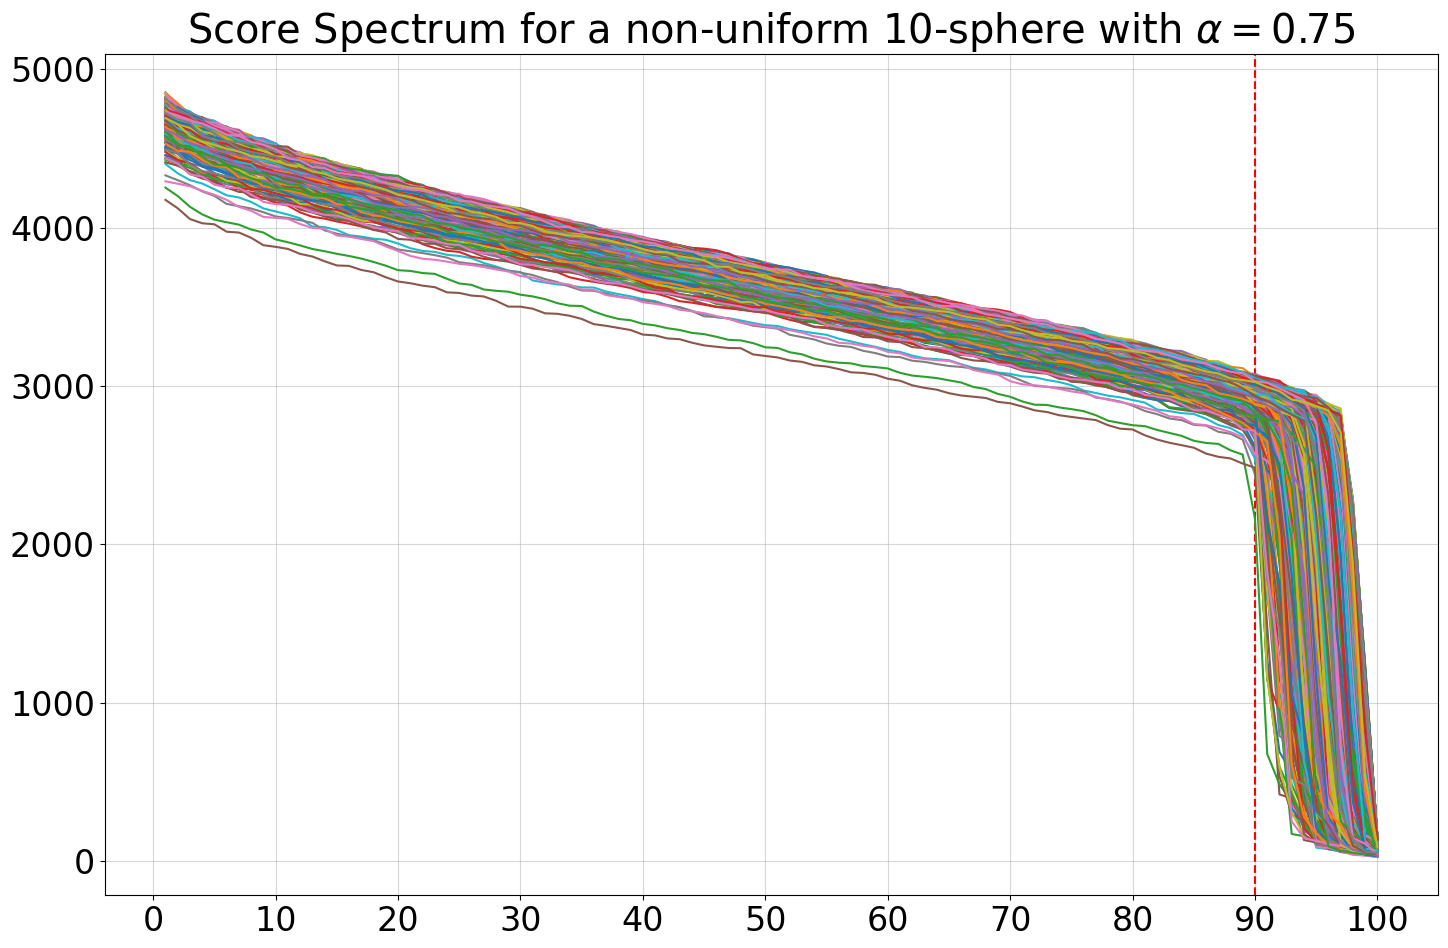

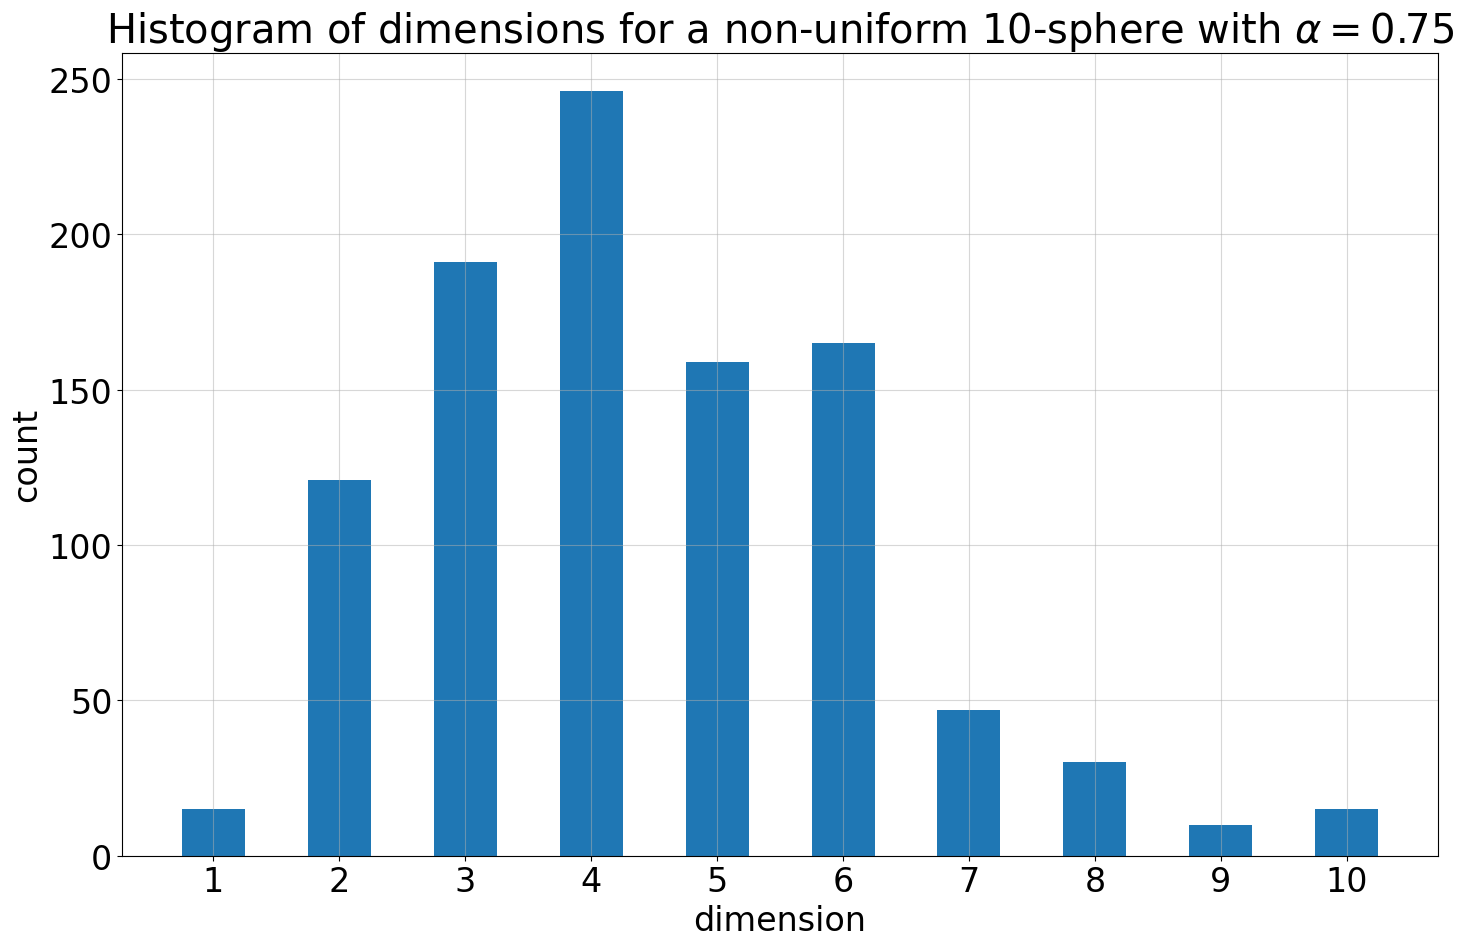

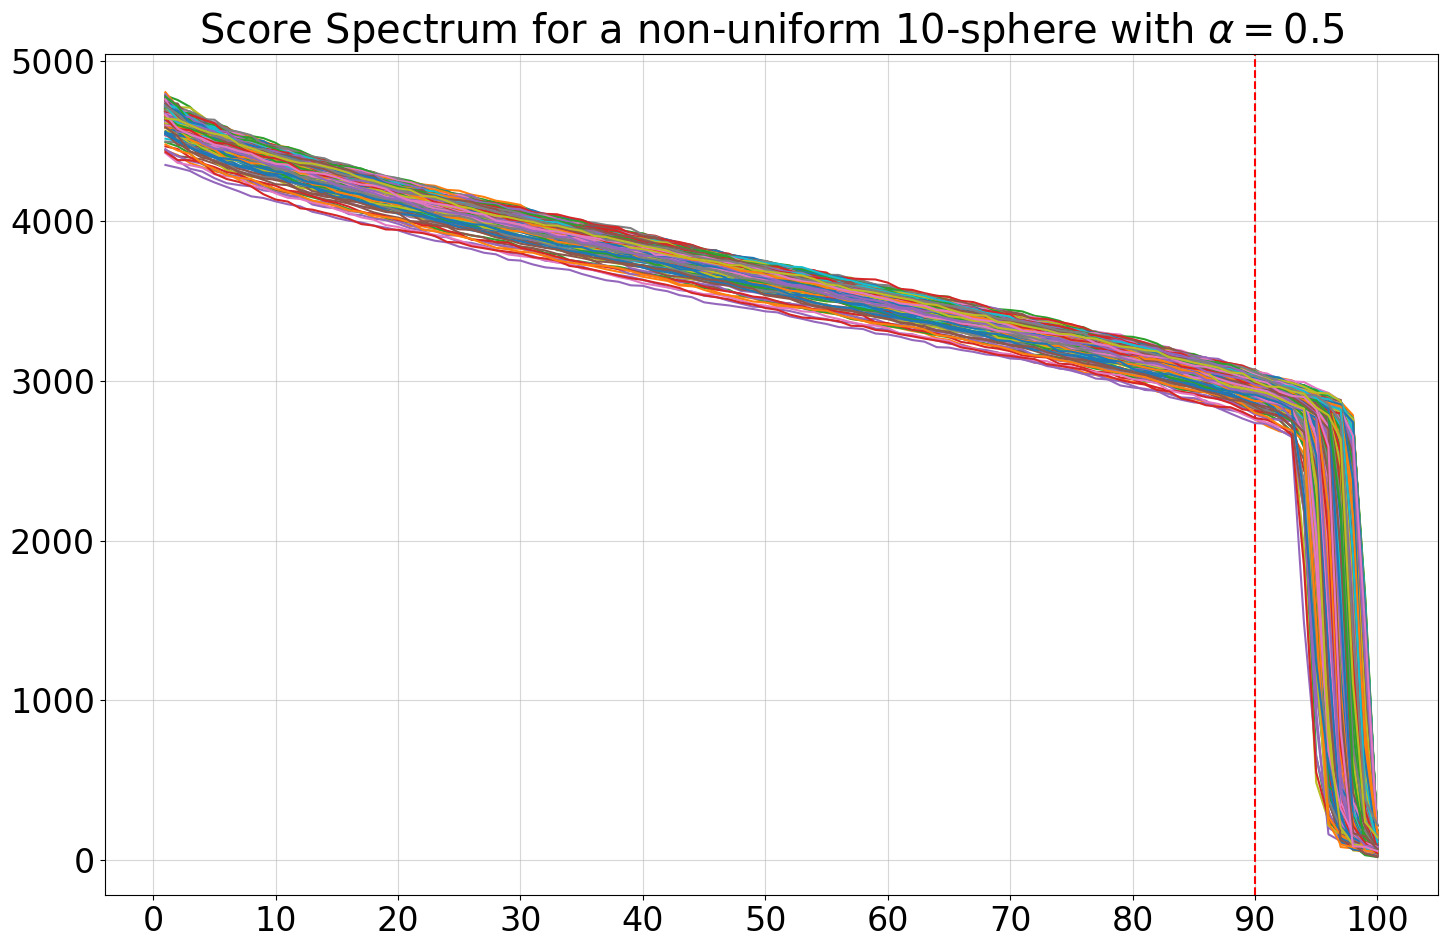

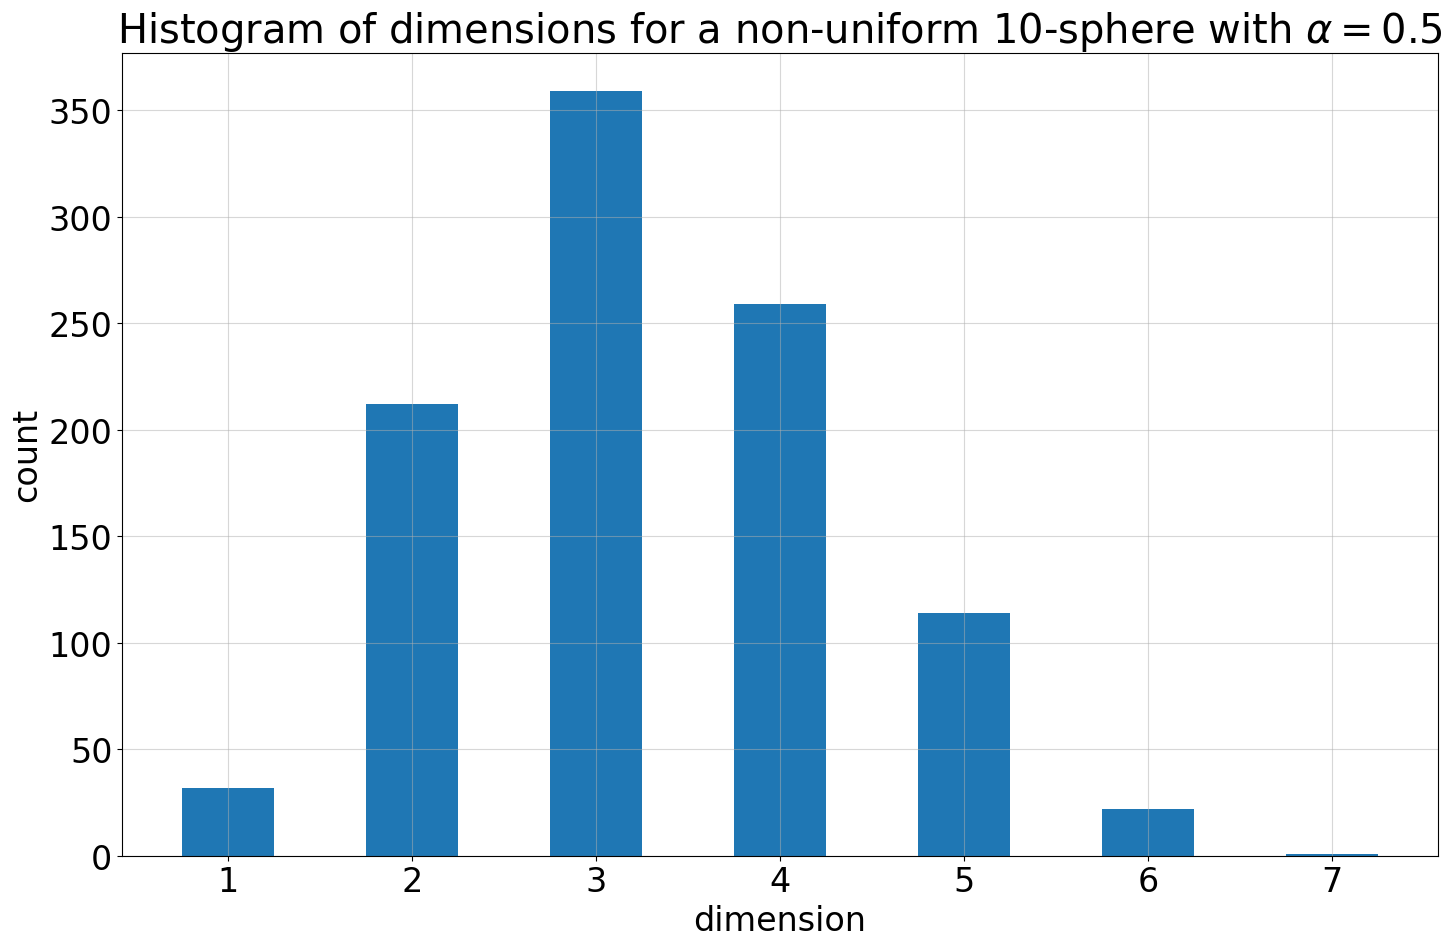

In [6]:
for std in [1, 0.75, 0.5]:
    config = read_config(f'logs/ksphere/n_1/dim_10/random_isometry/non_uniform_{std}/config.pkl')
    config.model.checkpoint_path = f'logs/ksphere/n_1/dim_10/random_isometry/non_uniform_{std}/checkpoints/best/last.ckpt'
    svd = get_manifold_dimension(config = config, name='svd', return_svd=True)
    os.makedirs('figures/paper/non_uniform_ksphere', exist_ok=True)
    fig_spectrum = plot_spectrum(svd, mode='all', title=f'Score Spectrum for a non-uniform 10-sphere with $\\alpha={std}$', ground_truth=10)
    fig_spectrum.savefig(f'figures/paper/non_uniform_ksphere/spectrum_{std}.png', bbox_inches='tight', dpi=300, facecolor='w')
    fig_dims, dims = plot_dims(svd, title=f'Histogram of dimensions for a non-uniform 10-sphere with $\\alpha={std}$' )
    fig_dims.savefig(f'figures/paper/non_uniform_ksphere/dims_{std}.png', bbox_inches='tight', dpi=300, facecolor='w')

Lightning automatically upgraded your loaded checkpoint from v1.5.1 to v1.9.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file logs/ksphere/n_1/dim_10/random_isometry/uniform_random/checkpoints/best/last.ckpt`
100%|█████████▉| 999/1000 [01:03<00:00, 15.78it/s]


Aggregation mode: all
Aggregation mode: all


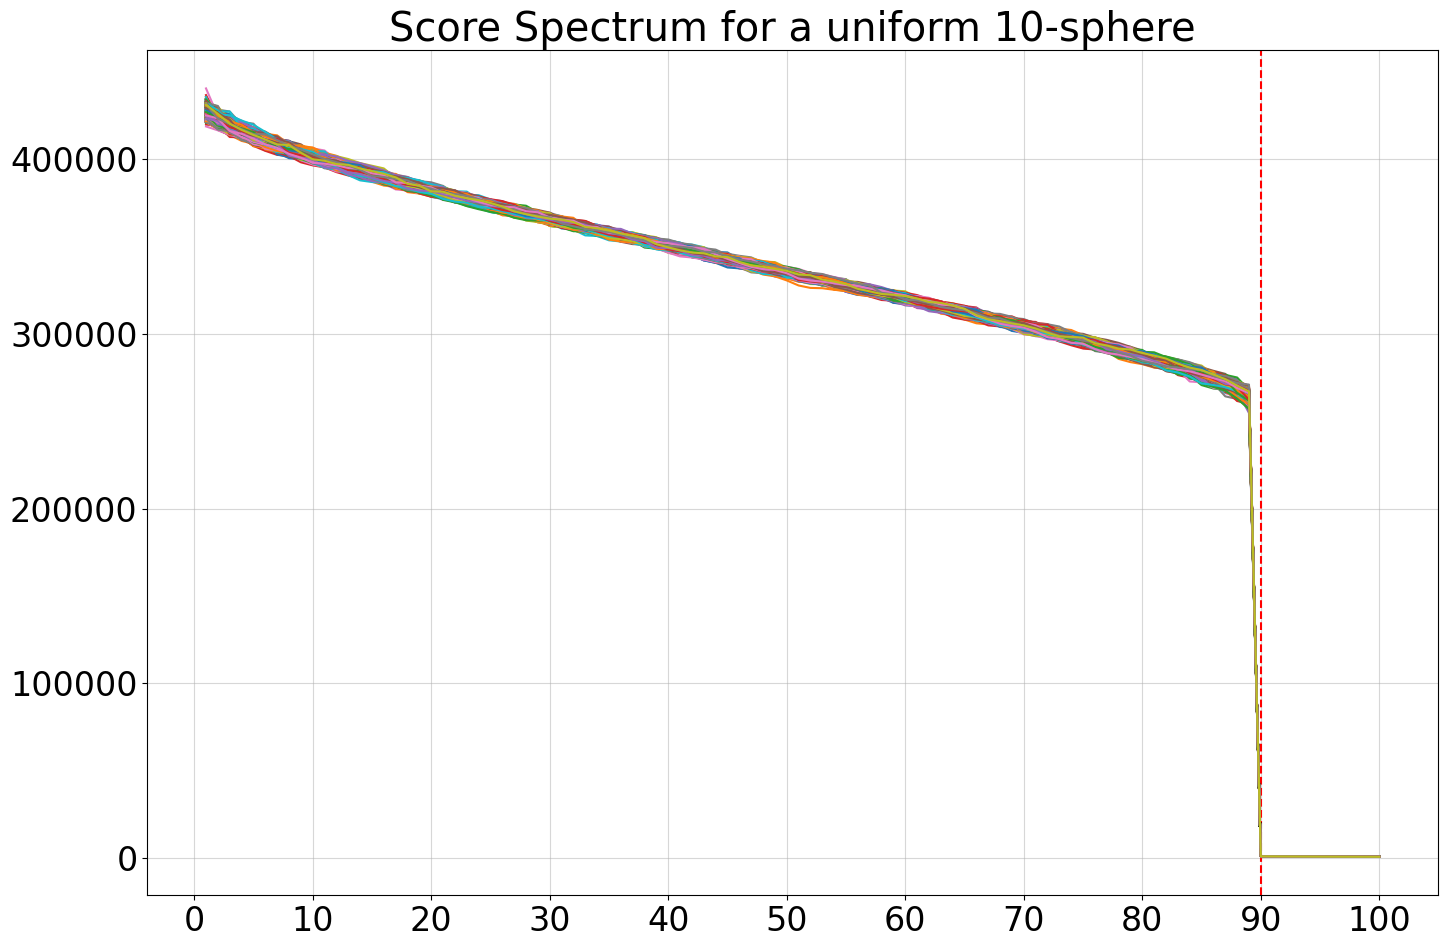

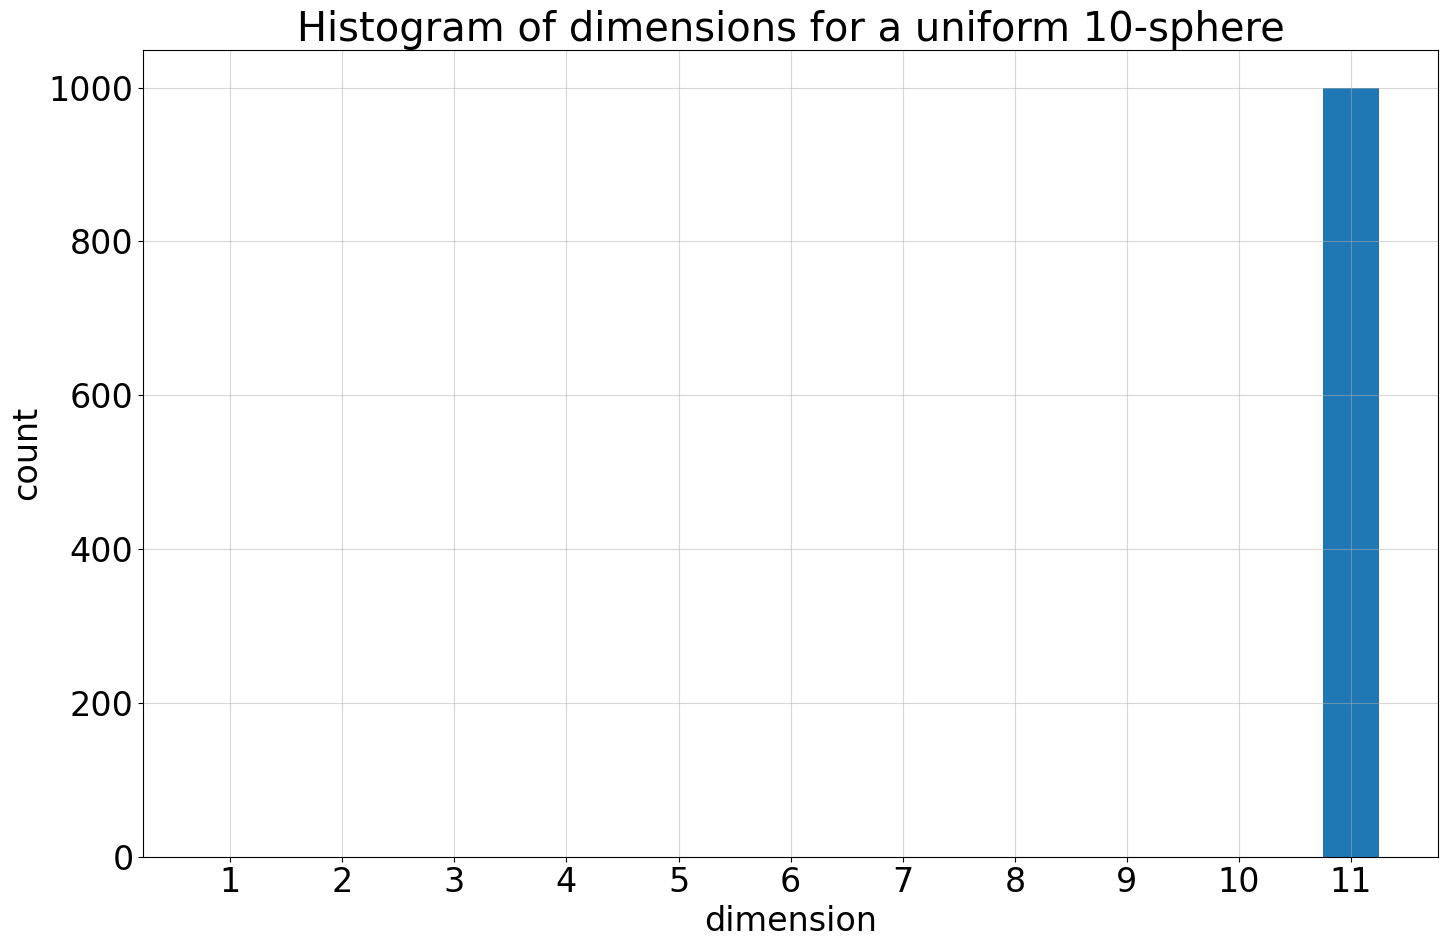

In [7]:
std=0
with open('logs/ksphere/n_1/dim_10/random_isometry/uniform_random/config.pkl', 'rb') as f:
    config = pickle.load(f)
config.model.checkpoint_path = 'logs/ksphere/n_1/dim_10/random_isometry/uniform_random/checkpoints/best/last.ckpt'
svd = get_manifold_dimension(config = config, name='svd', return_svd=True)
os.makedirs('figures/paper/non_uniform_ksphere', exist_ok=True)
fig_spectrum = plot_spectrum(svd, mode='all', title=f'Score Spectrum for a uniform 10-sphere', ground_truth=10)
fig_spectrum.savefig(f'figures/paper/non_uniform_ksphere/spectrum_{std}.png', bbox_inches='tight', dpi=300, facecolor='w')
fig_dims, dims = plot_dims(svd, title=f'Histogram of dimensions for a uniform 10-sphere' )
fig_dims.savefig(f'figures/paper/non_uniform_ksphere/dims_{std}.png', bbox_inches='tight', dpi=300, facecolor='w')